<a href="https://colab.research.google.com/github/naghmeadibi/CHW03_MachineLearning/blob/main/HW_NN_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>		
<font size=4>
<br/>
</div>

# Personal Data

In [ ]:
# Set your student number
student_number = 99101076
Name = 'Naghmeh'
Last_Name = 'Adibi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch. 

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Libraries

In [ ]:
import torch
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

import random

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [ ]:
## FILL HERE
train_set = CIFAR10(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = CIFAR10(root='.', train=False, download=True, transform=transforms.ToTensor())
trainloader = DataLoader(train_set, 64, shuffle=True)
testloader = DataLoader(test_set, 64, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


## Visualization

Visualize 1 random image from each class


10


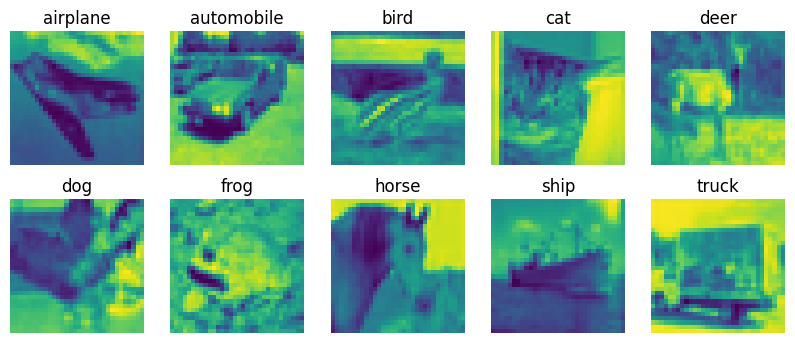

In [ ]:
## FILL HERE
class_images = {}
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(len(train_set)):
    image, label = train_set[i]
    if label not in class_images:
        class_images[label] = (image, label)
    elif random.randint(0, 100) == 1:
        class_images[label] = (image, label)

print(len(class_images))

fig, axs = plt.subplots(2, 5, figsize=(10, 4))
axs = axs.flatten()
for i in range(len(class_images)):
    axs[i].imshow(class_images[i][0][0])
    axs[i].set_title(class_names[i])
    axs[i].axis('off')
plt.show()

## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ## FILL HERE
        # Define the layers of your neural network here
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)   
        self.fc1 = nn.Linear(in_features=256 * 4 * 4, out_features=1024)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(in_features=1024, out_features=512)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(in_features=512, out_features=10)


    def forward(self, x):
        ## FILL HERE
        # Define the forward pass of your neural network here
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)  
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)       
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.pool(x)       
        x = x.view(-1, 256 * 4 * 4)    
        x = F.relu(self.dropout1(self.fc1(x)))
        x = F.relu(self.dropout2(self.fc2(x)))     
        x = self.fc3(x)
        return x

net = Net()

## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [ ]:
## FILL HERE
import torch.optim as optim
def loss_and_opt(scores, y, parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    optimizer = optim.SGD(parameters, lr = learning_rate) 
    loss_fn = nn.CrossEntropyLoss()
    optimizer.zero_grad()
    loss = loss_fn(scores, y)
    loss.backward()
    optimizer.step()
    return loss.item()

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [ ]:
epoch_nums = 10
for epoch in range(epoch_nums):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        ## FILL HERE
        ## You should train the model and also print the running loss for each batch
        input_images, labels = data
        outs = net(input_images)
        loss = loss_and_opt(outs, labels, net.parameters())
        running_loss +=  loss
        if i%100 == 99:
          print(f"[Epoch{epoch+1}, Batch{i+1}] Loss: {running_loss/100}")
          running_loss = 0.0

print('Finished Training')

[Epoch1, Batch100] Loss: 2.3083022022247315
[Epoch1, Batch200] Loss: 2.2757651948928834
[Epoch1, Batch300] Loss: 2.2453660798072814
[Epoch1, Batch400] Loss: 2.1977249908447267
[Epoch1, Batch500] Loss: 2.153470842838287
[Epoch1, Batch600] Loss: 2.0979585099220275
[Epoch1, Batch700] Loss: 2.032328276634216
[Epoch2, Batch100] Loss: 1.947095603942871
[Epoch2, Batch200] Loss: 1.9106185817718506
[Epoch2, Batch300] Loss: 1.8604884052276611
[Epoch2, Batch400] Loss: 1.8257188951969148
[Epoch2, Batch500] Loss: 1.7947177731990813
[Epoch2, Batch600] Loss: 1.7562815070152282
[Epoch2, Batch700] Loss: 1.7328673994541168
[Epoch3, Batch100] Loss: 1.6972293281555175
[Epoch3, Batch200] Loss: 1.6714489078521728
[Epoch3, Batch300] Loss: 1.6434871637821198
[Epoch3, Batch400] Loss: 1.618387906551361
[Epoch3, Batch500] Loss: 1.5867268431186676
[Epoch3, Batch600] Loss: 1.573109518289566
[Epoch3, Batch700] Loss: 1.5721491050720215
[Epoch4, Batch100] Loss: 1.5379057025909424
[Epoch4, Batch200] Loss: 1.5239385020

## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        ## FILL HERE
        images, labels = data
        out = net(images)
        _, pred = torch.max(out.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 62 %


Here, we also calculate the model performance for each class as well.

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in class_names}
total_pred = {classname: 0 for classname in class_names}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        ## FILL HERE
        images, labels = data
        outs = net(images)
        _, predicted = torch.max(outs.data, 1)
        
        # count predictions for each class
        for classname in class_names:
            label_indices = [i for i, label in enumerate(labels) if class_names[label] == classname]
            pred_indices = [i for i, pred in enumerate(predicted) if class_names[pred] == classname]
            correct_pred[classname] += len(set(label_indices) & set(pred_indices))
            total_pred[classname] += len(pred_indices)



# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 68.1 %
Accuracy for class: automobile is 79.5 %
Accuracy for class: bird  is 49.9 %
Accuracy for class: cat   is 44.0 %
Accuracy for class: deer  is 56.3 %
Accuracy for class: dog   is 52.5 %
Accuracy for class: frog  is 68.1 %
Accuracy for class: horse is 60.3 %
Accuracy for class: ship  is 71.4 %
Accuracy for class: truck is 70.7 %
